In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
today = df['date'].max()   # latest date in my DB
yesterday = today - timedelta(days=1)
before_yesterday = today - timedelta(days=2)

In [11]:
city = "Dehradun" #can use any city data

df_before_yest = df[(df['city'] == city) & (df['date'] == before_yesterday)]
df_yest = df[(df['city'] == city) & (df['date'] == yesterday)]


In [ ]:
df_before_yest_hourly = df_before_yest.sort_values("timestamp")
df_yest_hourly  = df_yest.sort_values("timestamp")


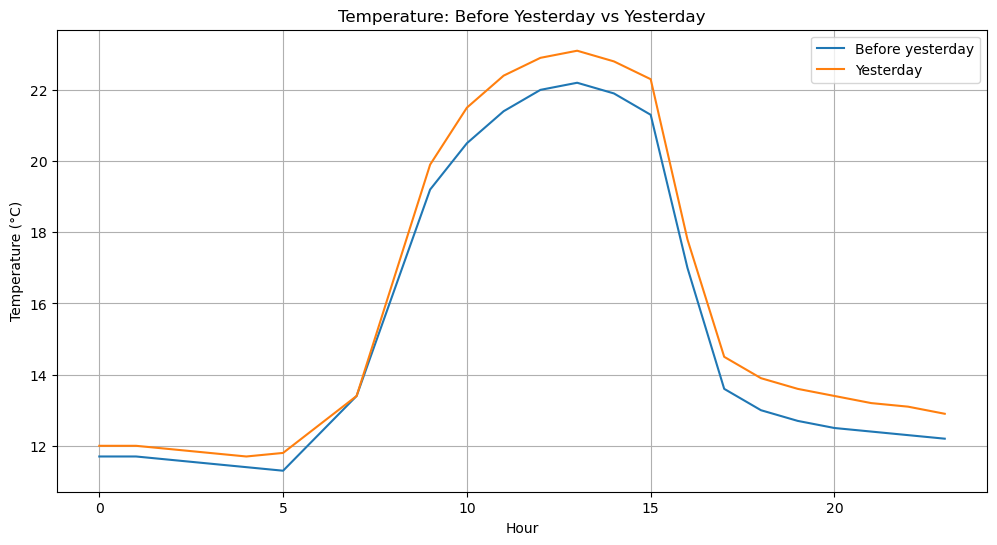

In [13]:
plt.figure(figsize=(12,6))

sns.lineplot(x=df_before_yest['hour'], y=df_before_yest['temperature'], label="Before yesterday")
sns.lineplot(x=df_yest['hour'], y=df_yest['temperature'], label="Yesterday")

plt.title("Temperature: Before Yesterday vs Yesterday")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


## "Comparision 